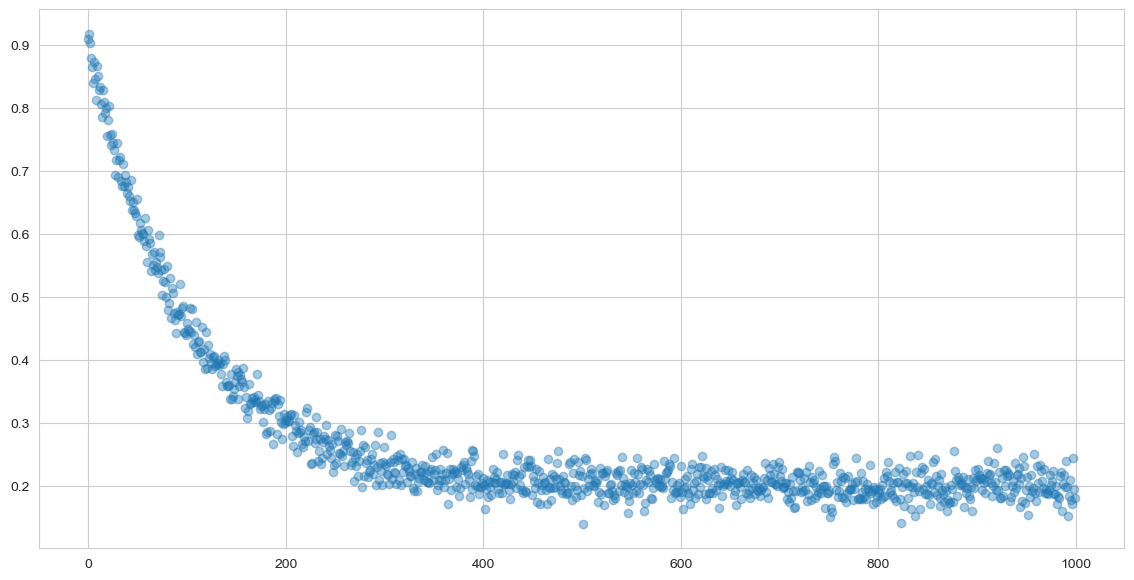

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.functional import F
from copy import copy
import seaborn as sns
sns.set_style("whitegrid")
n = 1000
noise = torch.Tensor(np.random.normal(0, 0.02, size=n))
x = torch.arange(n)
a, k, b = 0.7, .01, 0.2
y = a * np.exp(-k * x) + b + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)

In [3]:
class Model(nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # initialize weights with random numbers
        weights = torch.distributions.Uniform(0, 0.1).sample((3,))
        # make weights torch parameters
        self.weights = nn.Parameter(weights)        
        
    def forward(self, X):
        """Implement function to be optimised. In this case, an exponential decay
        function (a + exp(-k * X) + b),
        """
        a, k, b = self.weights
        return a * torch.exp(-k * X) + b
    
def training_loop(model, optimizer, n=1000):
    "Training loop for torch model."
    losses = []
    for i in range(n):
        preds = model(x)
        loss = F.mse_loss(preds, y).sqrt()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss)  
    return losses

Parameter containing:
tensor([0.6902, 0.0099, 0.2007], requires_grad=True)


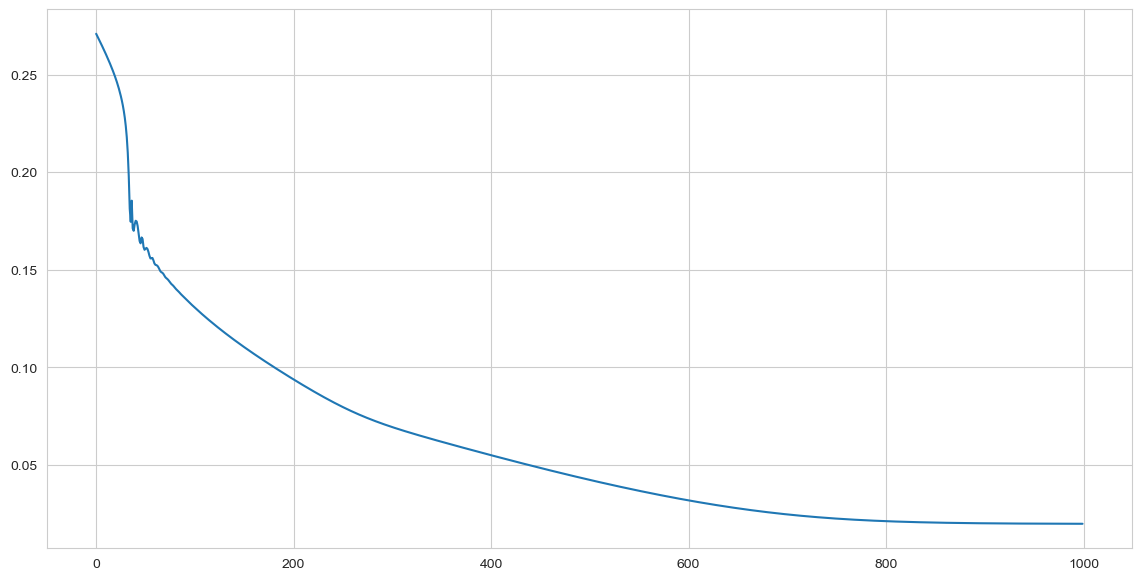

In [15]:
# instantiate model
m = Model()
# Instantiate optimizer
opt = torch.optim.Adam(m.parameters(), lr=0.001)
losses = training_loop(m, opt)
plt.figure(figsize=(14, 7))
with torch.no_grad():
    plt.plot(losses)

print(m.weights)

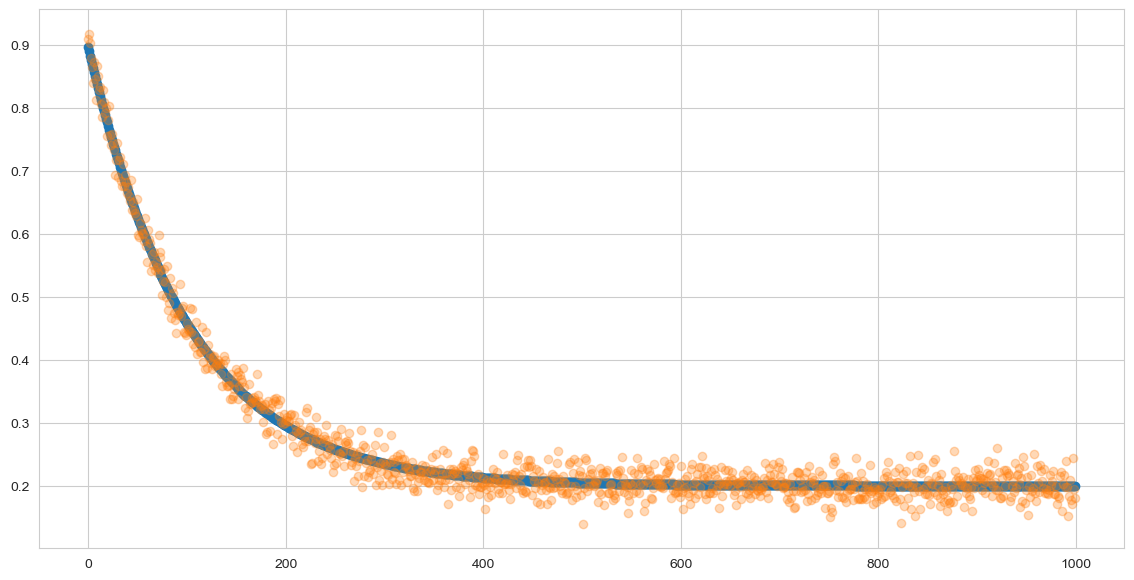

In [6]:
preds = m(x)
plt.figure(figsize=(14, 7))
plt.scatter(x, preds.detach().numpy())
plt.scatter(x, y, alpha=.3)